In [69]:
import json
import pickle, gzip
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("max_colwidth",200)

with gzip.open("train.pickle", 'rb') as f:
    train_data = pickle.load(f)
with gzip.open("validation.pickle", 'rb') as f:
    val_data = pickle.load(f)

In [70]:
train_data.head(3)

,source,ids,passage,summary
0,report,REPORT-speech-00001-00002,"고강도의 사회적 거리두기가 계속되면서 어려움을 느끼시는 분들이 많으실 것입니다. 여름 휴가철도 시작되었습니다. 하지만 이번 4차 유행을 막으려면 국민 여러분의 협조가 무엇보다 중요하십니다. 어렵겠지만 4차 유행의 차단을 위해 최대한 약속이나 모임, 이동량을 줄여주시고, 사람 간의 접촉을 줄여주실 것을 당부드립니다. 다음 주말까지 유행 중심 지역인 수...",4차 유행 차단을 위해 비수도권으로서의 확산을 막는 것이 가장 중요한 목표이므로 약속이나 이동량을 최대한 줄이길 당부한다.
1,report,REPORT-speech-00001-00005,"이 부분은 아직 그 나라들의 선례를 저희가 따라가기에는 좀 이르다고 판단됩니다. 우선, 몇 가지 좀 같이 봐야 되는 것들이 우리나라의 경우에는 지금 예방접종이 다시 지금 본격화되고 있는 국면이기 때문에 적어도 예방접종이 어느 정도 상당히 확대될 때까지는 현재의 확진자 규모 전체를 지속적으로 일정수준 이하로 억제하는 정책을 함께 주요 정책으로 가져가...",예방접종이 어느 정도 확대될 때까지는 확진자 규모 전체를 지속적이고 일정 수준 이하로 억제하는 정책이 필요하다.
2,report,REPORT-speech-00002-00003,"따라서 본 약관조항은 고객이 예상하기 어려운 조항 및 고객에게 부당하게 불리한 조항으로 무효입니다. 네 번째로 부당한 환불 및 반환 조항입니다. 기존에는 선물 받은 콘텐츠, 이자 수입, 절사된 금액에 대한 보상은 환불·반환·지급되지 않으며, 최소 출금 가능 금액보다 적은 잔고는 반환되지 않거나 이용계약 해지 시 모두 소멸된다고 규정하였습니다. 그러나...","선물 받은 콘텐츠, 절사된 금액에 대한 보상은 환불·반환·지급되지 않고 최소 출금 가능 금액보다 적은 잔고는 이용계약 해지 시 소멸된다고 규정한 약관조항은 무효이다."


In [71]:
val_data.head(3)

,source,ids,passage,summary
0,report,REPORT-speech-00003-00003,"지난주 부동산시장 점검 관계장관회의를 통하여 편법적인 '실거래가 띄우기' 사례가 확인된 것과 같이 불법·편법거래 및 시장교란행위가 우리의 부동산시장을 왜곡하고 있기도 합니다. 기대심리와 투기수요, 불법거래가 비중 있게 가격상승을 견인하는 상황하에서는 주택가격이 지속적으로 오를 수는 없다 하겠습니다. 그간 여러 기회를 통하여 향후 주택가격의 조정가능성...",국내 기관뿐만 아니라 BIS 등 국제기구에서도 과도하게 상승한 주택 가격의 조정 가능성을 지적한다.
1,report,REPORT-speech-00003-00008,"특히, 글로벌 금리 상승 시에는 자산시장 가격조정이 맞물림 되고 그렇게 되면 경제 전반에 부실이 확대될 수도 있습니다. 정부는 우리 경제의 안정적 성장과 부동산시장 안정을 위해 코로나19 이후 증가한 시중 유동성에 대한 관리를 강화해나가고자 합니다. 특히, 우리 경제의 잠재 불안요인으로 지적되는 가계부채를 보다 촘촘히 점검·관리해 나갈 계획입니다. ...",정부는 경제의 안정적 성장과 부동산시장 안정을 위해 가계부채를 보다 촘촘히 점검·관리해 나갈 계획이다.
2,report,REPORT-speech-00012-00003,"채용 등에서 고용상의 성차별, 직장 내 성희롱 시에 사업주의 조치와 관련하여 노동위원회 내에 구제 절차를 신설하도록 하겠습니다. 기업 내에 일·생활 균형문화 확산을 위해 현재 운영 중인 가족친화인증제도와 여가친화인증제도의 인증 기준을 강화하는 등 제도를 내실화하겠습니다. 의료종사자의 인권침해 예방 그리고 대응교육 강화를 위해 시행되는 가사근로자법의 ...",의료종사자의 인권침해 예방 등 여성이 많이 종사하는 직종에 대한 보호를 강화해나가고 성별 업종이 분리되는 현상을 완화하기 위해 고용개선조치제도의 개선방안을 마련한다.


In [72]:
train_data["source"].value_counts()

report       32000
broadcast    30329
dacon         2994
Name: source, dtype: int64

In [73]:
val_data["source"].value_counts()

report       4000
broadcast    3300
Name: source, dtype: int64

Text(0.5, 1.0, 'Density of validation passage length')

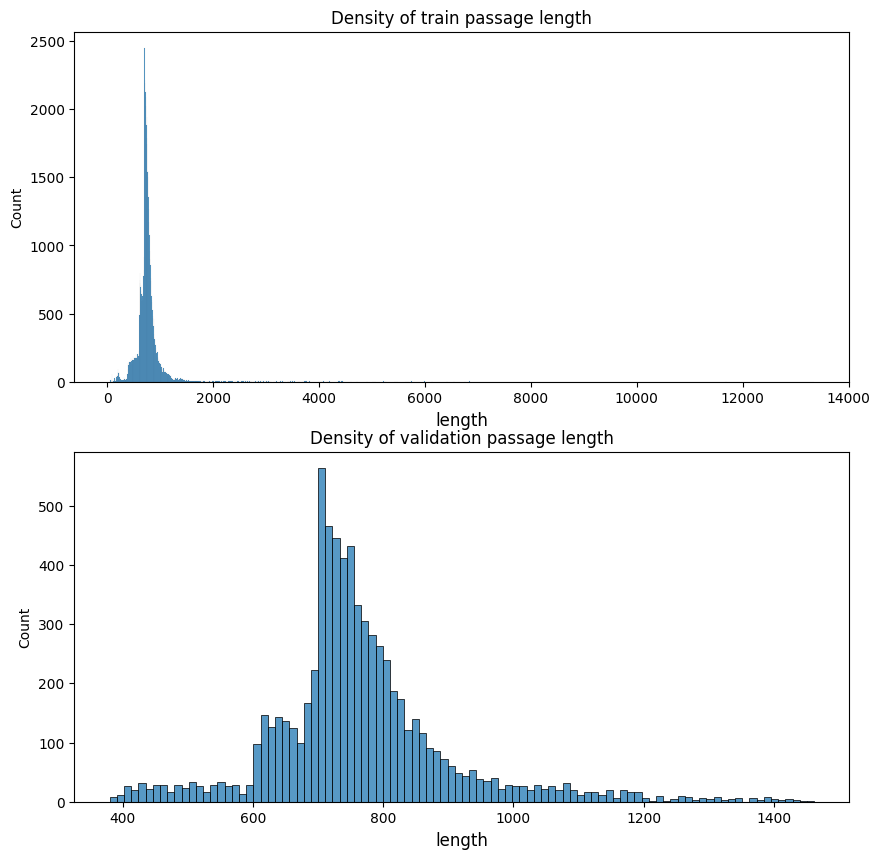

In [74]:
# passage 길이 시각화
train_passage_len = [len(i) for i in train_data["passage"]]
valid_passage_len = [len(i) for i in val_data["passage"]]

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

g = sns.histplot(train_passage_len, ax=axes[0])
axes[0].set_xlabel("length", fontsize=12)
axes[0].set_title('Density of train passage length')


g = sns.histplot(valid_passage_len, ax=axes[1])
axes[1].set_xlabel("length", fontsize=12) 
axes[1].set_title('Density of validation passage length')

 

Text(0.5, 1.0, 'Density of validation summary length')

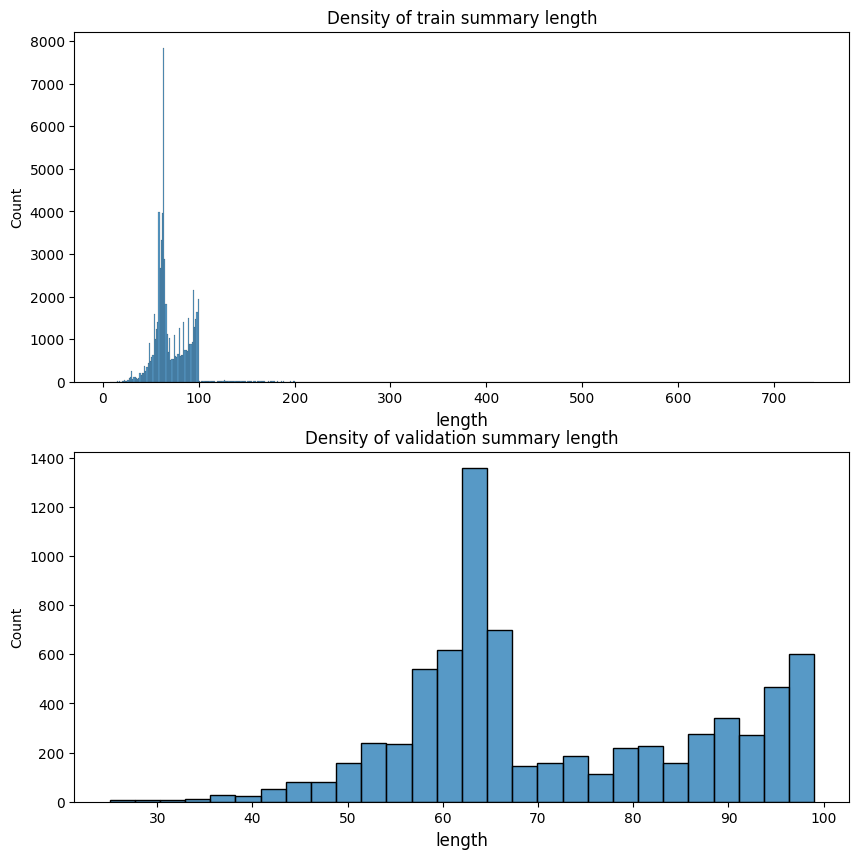

In [75]:
# summary 길이 시각화
train_summary_len = [len(i) for i in train_data["summary"]]
valid_summary_len = [len(i) for i in val_data["summary"]]

fig, axes = plt.subplots(2, 1, figsize=(10, 10))

g = sns.histplot(train_summary_len, ax=axes[0])
axes[0].set_xlabel("length", fontsize=12)
axes[0].set_title('Density of train summary length')


g = sns.histplot(valid_summary_len, ax=axes[1])
axes[1].set_xlabel("length", fontsize=12) 
axes[1].set_title('Density of validation summary length')

 

In [76]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("mountinyy/FiD-kor-bart")

In [77]:
print(tokenizer.tokenize(train_data["passage"][0]))

['▁고', '강', '도', '의', '▁사', '회', '적', '▁거리', '두', '기', '가', '▁계속', '되', '면', '서', '▁어', '려', '움', '을', '▁느끼', '시', '는', '▁분', '들', '이', '▁많', '으', '실', '▁것', '입', '니다', '.', '▁여름', '▁휴가', '철', '도', '▁시작', '되', '었', '습', '니다', '.', '▁', '하지만', '▁이번', '▁4', '차', '▁유', '행', '을', '▁막', '으', '려', '면', '▁국', '민', '▁여러', '분', '의', '▁', '협', '조', '가', '▁무엇', '보', '다', '▁중요', '하', '십', '니다', '.', '▁어렵', '겠', '지', '만', '▁4', '차', '▁유', '행', '의', '▁차', '단', '을', '▁위해', '▁최', '대', '한', '▁약속', '이', '나', '▁모', '임', ',', '▁이', '동', '량', '을', '▁줄', '여', '주', '시', '고', ',', '▁사람', '▁간', '의', '▁접', '촉', '을', '▁줄', '여', '주', '실', '▁것', '을', '▁당', '부', '드', '립', '니다', '.', '▁다음', '▁주말', '까', '지', '▁유', '행', '▁중', '심', '▁지', '역', '인', '▁수', '도', '권', '의', '▁유', '행', '▁확', '산', '세', '를', '▁감', '소', '세', '로', '▁반', '전', '시', '키', '고', ',', '▁비', '수', '도', '권', '으', '로', '의', '▁확', '산', '을', '▁차', '단', '하', '는', '▁것', '이', '▁현', '재', '▁시', '점', '에', '서', '▁가', '장', '▁중요', '한', '▁목', '표', '입', '니다', '.', '▁이',

In [78]:
train_passage_token, valid_passage_token = [], []
train_summary_token, valid_summary_token = [], []
for i in range(len(train_data)):
    train_passage_token.append(len(tokenizer.tokenize(train_data["passage"][i])))
    train_summary_token.append(len(tokenizer.tokenize(train_data["summary"][i])))
for i in range(len(val_data)):
    valid_passage_token.append(len(tokenizer.tokenize(val_data["passage"][i])))
    valid_summary_token.append(len(tokenizer.tokenize(val_data["summary"][i])))   

Text(0.5, 1.0, 'Density of validation summary length')

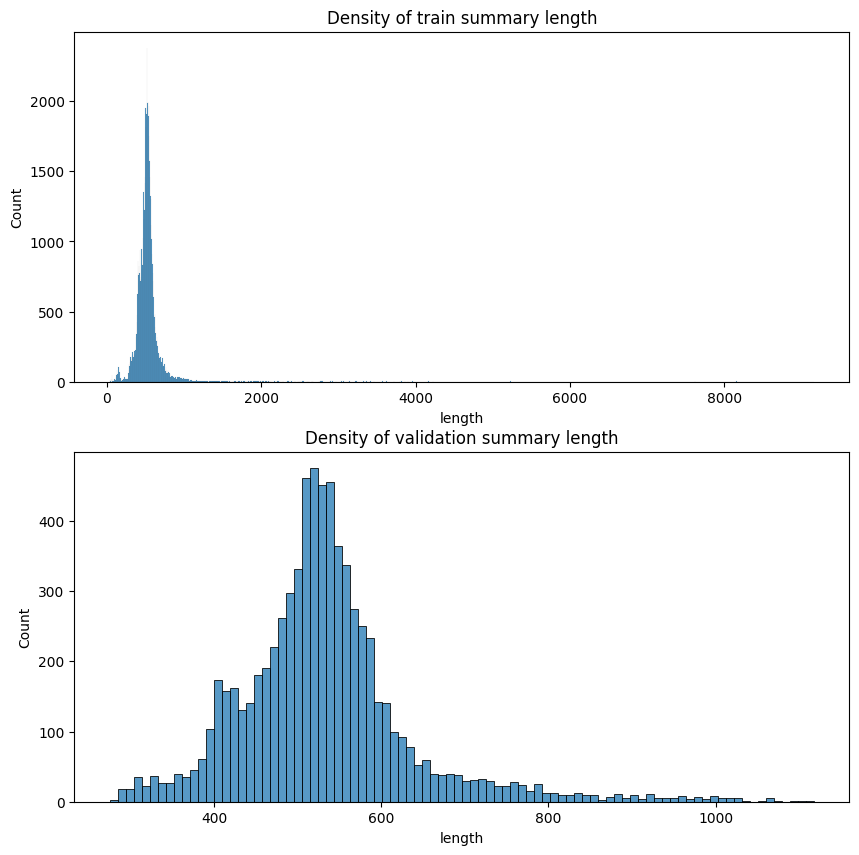

In [79]:
# passage 토큰화 길이 분포
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

g = sns.histplot(train_passage_token, ax=axes[0])
axes[0].set_xlabel("length", fontsize=10)
axes[0].set_title('Density of train summary length')


g = sns.histplot(valid_passage_token, ax=axes[1])
axes[1].set_xlabel("length", fontsize=10) 
axes[1].set_title('Density of validation summary length')


Text(0.5, 1.0, 'Density of validation summary length')

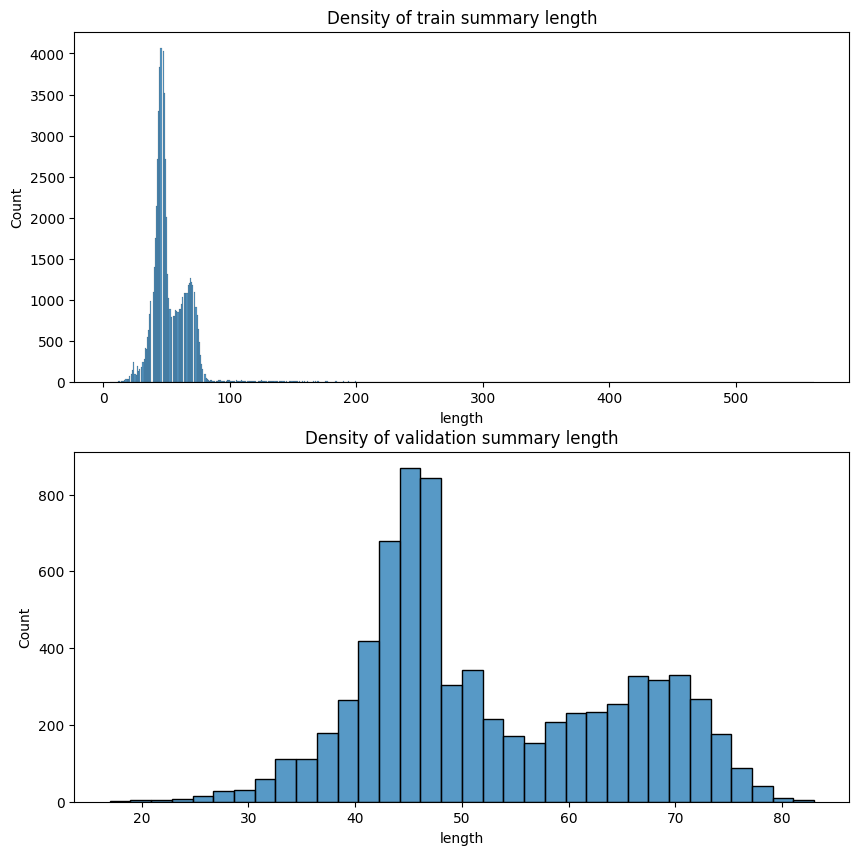

In [80]:
# summary 토큰화 길이 분포
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

g = sns.histplot(train_summary_token, ax=axes[0])
axes[0].set_xlabel("length", fontsize=10)
axes[0].set_title('Density of train summary length')


g = sns.histplot(valid_summary_token, ax=axes[1])
axes[1].set_xlabel("length", fontsize=10) 
axes[1].set_title('Density of validation summary length')
 